# Retail: Loyalty Program Analysis

## Table of contents  
1.[Introduction](#intro)  
2.[Steps](#steps)  
3.[Data preprocessing](#data)    
4.[Exploratory Data Analysis](#eda)   
5.[Statistical Data Analysis](#sda)  
6.[Final Conclusion](#end)  
7.[Presentation](#presentation)  
8.[Documentation](#doc)  
9.[Dashboard](#dashboard)  

<a id="Introduction">

## Introduction  
   <b>Home Store is a building material retail store . Our project is to analyse the loyalty program  
      of the store and find out if loyalty program is a successfully used by customers to increase  
      their purchase size and the money spent .</b>

<a id="steps">

## Steps
<b>- Carry out exploratory data analysis  
<b>- Analyze the loyalty program  
<b>- Formulate and test statistical hypotheses

In [1]:
#import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

In [2]:
#Study the dataset "retail_dataset"
warnings.filterwarnings("ignore")
retail_df=pd.read_csv('retail_dataset_us.csv',sep=',')
retail_df.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


<a id="data">

## Data Preprocessing

In [4]:
#changing column name for uniformity
retail_df=retail_df.rename(columns={'purchaseid':'Purchase_id',
                                   'item_ID':'Item_id',
                                   'purchasedate':'Purchase_date',
                                   'CustomerID':'Customer_id',
                                   'loyalty_program':'Loyalty_program',
                                   'ShopID':'Shop_id'})
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Purchase_id      105335 non-null  object 
 1   Item_id          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   Purchase_date    105335 non-null  object 
 4   Customer_id      69125 non-null   float64
 5   Loyalty_program  105335 non-null  int64  
 6   Shop_id          105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [5]:
#converting 'loyalty_program' to category and 'purchase_date' to datetime
retail_df['Loyalty_program']=retail_df['Loyalty_program'].astype('category')
retail_df['Purchase_date']=pd.to_datetime(retail_df['Purchase_date'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Purchase_id      105335 non-null  object        
 1   Item_id          105335 non-null  object        
 2   Quantity         105335 non-null  int64         
 3   Purchase_date    105335 non-null  datetime64[ns]
 4   Customer_id      69125 non-null   float64       
 5   Loyalty_program  105335 non-null  category      
 6   Shop_id          105335 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.9+ MB


<b>69125 out of 105335 records have customer details which is around (65%).Around 35% of records miss customer_id.

In [6]:
retail_df.duplicated().sum()

1033

In [7]:
retail_df[retail_df.duplicated(keep=False)].head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id
39,545071,85036A,0,2017-02-27 15:59:00,21675.0,0,Shop 23
116,537772,22659,3,2016-12-08 12:35:00,23722.0,1,Shop 27
248,544336,22858,0,2017-02-17 19:36:00,18909.0,0,Shop 7
360,541251,22284,11,2017-01-16 13:25:00,20725.0,0,Shop 0
505,536522,21122,0,2016-12-01 12:49:00,20691.0,0,Shop 10


In [8]:
retail_df.drop_duplicates(inplace=True)

In [9]:
retail_df['Item_id'].value_counts()

85123A      561
22423       497
22469       412
22720       375
85099B      372
           ... 
DCGS0072      1
22125         1
21226         1
84977         1
79320         1
Name: Item_id, Length: 3159, dtype: int64

In [10]:
retail_df['Purchase_id'].value_counts()

537434     675
538071     651
538349     613
537638     601
537237     597
          ... 
C543775      1
537013       1
543385       1
C544577      1
C541650      1
Name: Purchase_id, Length: 4894, dtype: int64

<b>Some Purchase_id starts with C.Will look at those records to see any pattern.

## Exploratory Data Analysis

<a id='eda'>

In [11]:
#filtering records with Purchase_id starting with 'C'
retail_df[retail_df['Purchase_id'].str.startswith('C')].head(10)

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id
64,C539944,22776,-2,2016-12-23 11:38:00,20239.0,0,Shop 27
109,C542910,20726,-2,2017-02-01 15:38:00,23190.0,1,Shop 19
112,C542426,22418,-25,2017-01-28 09:32:00,19825.0,0,Shop 27
253,C539726,22791,-11,2016-12-21 14:24:00,22686.0,1,Shop 3
344,C544034,21878,-2,2017-02-15 11:28:00,20380.0,0,Shop 9
458,C539667,21285,-25,2016-12-21 10:47:00,18827.0,0,Shop 4
636,C543764,79191D,-13,2017-02-11 15:16:00,22714.0,1,Shop 18
660,C537602,22423,-3,2016-12-07 12:45:00,23190.0,1,Shop 15
742,C539260,21258,-8,2016-12-16 14:32:00,20779.0,0,Shop 21
748,C540417,85099B,-101,2017-01-07 10:56:00,19359.0,0,Shop 9


<b>The above table shows that all the records have negative quantities which concludes that the items are returned if the   
Purchase_id starts with C.

In [12]:
retail_df['Quantity'].value_counts()

 0       32362
 1       16137
 11      10265
 5        7931
 2        7444
         ...  
 197         1
 209         1
-601         1
 899         1
-2601        1
Name: Quantity, Length: 301, dtype: int64

<b>Around 30% of records have Quantity as 0 which cannot be deleted . It might represent products that didn't go through in   
the final checkout ..

In [13]:
retail_df[retail_df['Quantity']==0].sort_values(by='Purchase_date').head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id
6244,536381,22438,0,2016-12-01 09:41:00,20990.0,0,Shop 16
88892,536381,71270,0,2016-12-01 09:41:00,20990.0,0,Shop 16
57894,536381,22261,0,2016-12-01 09:41:00,20990.0,0,Shop 16
58510,536381,22644,0,2016-12-01 09:41:00,20990.0,0,Shop 16
51914,536381,22637,0,2016-12-01 09:41:00,20990.0,0,Shop 16


In [14]:
#Check if any return item with Quantity 0. 
retail_df[((retail_df['Purchase_id'].str.startswith('C')) & (retail_df['Quantity']==0))]

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id


<b>No quantity  0 in return items.

In [15]:
#check portion of data in loyalty program
member_count=pd.DataFrame(retail_df['Loyalty_program'].value_counts())
member_count.index=['Loyalty_non_members','Loyalty_members']
member_count.columns=['Count']
member_count

,Count
Loyalty_non_members,80890
Loyalty_members,23412


<b>Around 80% of the data not in loyalty program.. Only less than 25% of the data has loyalty membership .

In [16]:
#Customers in loyalty program
retail_df[retail_df['Loyalty_program']==1].head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805.0,1,Shop 20


In [17]:
#number of unique purchases made with loyalty program
retail_df[retail_df['Loyalty_program']==1]['Purchase_id'].nunique()

1344

In [18]:
#number of unique customers in loyalty program
retail_df[retail_df['Loyalty_program']==1]['Customer_id'].nunique()

587

In [19]:
retail_df['Customer_id'].value_counts()

18427.0    774
23520.0    751
20285.0    745
20990.0    715
20590.0    549
          ... 
22417.0      1
23295.0      1
18945.0      1
20749.0      1
23763.0      1
Name: Customer_id, Length: 1749, dtype: int64

<b>Around 1749 unique customers known from the data.

In [20]:
#missing customer id data
missing_customer_df=retail_df[retail_df['Customer_id'].isna()]
missing_customer_df.head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0


In [21]:
#loyalty members in missing customer data
missing_customer_df['Loyalty_program'].value_counts()

0    36148
1        0
Name: Loyalty_program, dtype: int64

<b> All the missing customers are not members of Loyalty program..

In [22]:
#checking the missing customer_id by days
missing_customer_df.sort_values(by='Purchase_date').head(10)

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id
86486,536414,22139,55,2016-12-01 11:52:00,NaN,0,Shop 0
92419,536544,22633,2,2016-12-01 14:32:00,NaN,0,Shop 0
71571,536544,21369,0,2016-12-01 14:32:00,NaN,0,Shop 0
101721,536544,22069,0,2016-12-01 14:32:00,NaN,0,Shop 0
21527,536544,17012B,1,2016-12-01 14:32:00,NaN,0,Shop 0
92288,536544,22300,0,2016-12-01 14:32:00,NaN,0,Shop 0
62000,536544,22664,3,2016-12-01 14:32:00,NaN,0,Shop 0
13595,536544,22605,0,2016-12-01 14:32:00,NaN,0,Shop 0
17098,536544,21328,1,2016-12-01 14:32:00,NaN,0,Shop 0
86627,536544,22107,0,2016-12-01 14:32:00,NaN,0,Shop 0


In [23]:
retail_df.sort_values(by='Purchase_date').head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id
32942,536365,71053,5,2016-12-01 08:26:00,23529.0,1,Shop 27
32454,536365,21730,5,2016-12-01 08:26:00,23529.0,1,Shop 27
69816,536365,84406B,7,2016-12-01 08:26:00,23529.0,1,Shop 27
73410,536365,84029G,5,2016-12-01 08:26:00,23529.0,1,Shop 27
85802,536365,22752,1,2016-12-01 08:26:00,23529.0,1,Shop 27


In [24]:
#purchases made by missing customer
missing_customer_pivot=missing_customer_df.pivot_table(index=['Purchase_date'],values='Purchase_id',aggfunc='nunique').reset_index()
missing_customer_pivot.head()

,Purchase_date,Purchase_id
0,2016-12-01 11:52:00,1
1,2016-12-01 14:32:00,2
2,2016-12-01 14:33:00,2
3,2016-12-01 14:34:00,3
4,2016-12-01 14:35:00,2


In [25]:
missing_customer_df[missing_customer_df['Loyalty_program']==1]

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id


In [26]:
#checking the unique purchase_id in missing
retail_df[retail_df['Customer_id'].isna()]['Purchase_id'].nunique()

748

<b>Count of Customer_id missing is not more than 748(less than or equal to ) who contributes  to 36210 records..

In [27]:
#filling missing customer_id if it shares same 'purchase_id' with customer_id 
retail_df['Customer_id']=retail_df['Customer_id'].fillna(retail_df.groupby('Purchase_id')['Customer_id'].transform('first'))

In [28]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Purchase_id      104302 non-null  object        
 1   Item_id          104302 non-null  object        
 2   Quantity         104302 non-null  int64         
 3   Purchase_date    104302 non-null  datetime64[ns]
 4   Customer_id      68154 non-null   float64       
 5   Loyalty_program  104302 non-null  category      
 6   Shop_id          104302 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.7+ MB


<b>No change in count of Customer_id..

In [29]:
#download the product code dataset
product_df=pd.read_csv('product_codes_us.csv',sep=';')
product_df.tail()

,productID,price_per_one
3154,gift_0001_20,16.67
3155,gift_0001_30,25.00
3156,gift_0001_40,34.04
3157,gift_0001_50,42.55
3158,m,2.55


In [30]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [31]:
product_df.duplicated().sum()

0

<b>No missing values and duplicates in product dataset.

In [32]:
#rename columns for uniformity
product_df=product_df.rename(columns={'productID':'Item_id','price_per_one':'Price_per_one'})
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item_id        3159 non-null   object 
 1   Price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [33]:
product_df['Item_id'].value_counts()

10002     1
72132     1
72134     1
72140E    1
72225C    1
         ..
22164     1
22165     1
22166     1
22167     1
m         1
Name: Item_id, Length: 3159, dtype: int64

In [34]:
#merge price_per_one column to retail dataset based on item_id
retail_df=pd.merge(retail_df,product_df,on='Item_id')
retail_df.head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42
1,541104,21873,0,2017-01-13 14:29:00,NaN,0,Shop 0,0.42
2,540418,21873,1,2017-01-07 11:04:00,NaN,0,Shop 0,0.42
3,541516,21873,2,2017-01-18 17:34:00,NaN,0,Shop 0,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42


In [35]:
#check for duplicates
retail_df.duplicated().sum()

0

In [36]:
#Analysing data
retail_df[retail_df['Customer_id']==23529.0].sort_values(by=['Purchase_date','Item_id']).head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one
96729,536365,21730,5,2016-12-01 08:26:00,23529.0,1,Shop 27,4.25
39365,536365,22752,1,2016-12-01 08:26:00,23529.0,1,Shop 27,7.65
71787,536365,71053,5,2016-12-01 08:26:00,23529.0,1,Shop 27,3.39
15930,536365,84029E,5,2016-12-01 08:26:00,23529.0,1,Shop 27,0.00
23954,536365,84029G,5,2016-12-01 08:26:00,23529.0,1,Shop 27,3.39


In [37]:
#Analysing data
retail_df[retail_df['Customer_id']==23043.0].sort_values(by=['Purchase_date','Item_id']).head(10)

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one
70647,540992,18098C,2,2017-01-12 16:57:00,23043.0,1,Shop 9,0.00
68054,540992,21058,0,2017-01-12 16:57:00,23043.0,1,Shop 9,0.72
68057,540992,21058,5,2017-01-12 16:57:00,23043.0,1,Shop 9,0.72
82557,540992,21062,3,2017-01-12 16:57:00,23043.0,1,Shop 9,0.85
6080,540992,21063,2,2017-01-12 16:57:00,23043.0,1,Shop 9,0.85
6839,540992,21212,3,2017-01-12 16:57:00,23043.0,1,Shop 9,0.40
60486,540992,21217,0,2017-01-12 16:57:00,23043.0,1,Shop 9,8.95
60432,540992,21326,11,2017-01-12 16:57:00,23043.0,1,Shop 9,0.55
51188,540992,21327,2,2017-01-12 16:57:00,23043.0,1,Shop 9,1.65
13085,540992,21328,2,2017-01-12 16:57:00,23043.0,1,Shop 9,1.65


In [38]:
#Analysing data
retail_df.sort_values(by='Purchase_date').iloc[60:80]

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one
72480,536373,37370,5,2016-12-01 09:02:00,23529.0,1,Shop 1,1.06
80776,536373,82483,1,2016-12-01 09:02:00,23529.0,1,Shop 1,4.95
8641,536373,85123A,5,2016-12-01 09:02:00,23529.0,1,Shop 1,0.00
16514,536373,82482,5,2016-12-01 09:02:00,23529.0,1,Shop 1,2.10
71768,536373,71053,5,2016-12-01 09:02:00,23529.0,1,Shop 1,3.39
45511,536374,21258,31,2016-12-01 09:09:00,20779.0,0,Shop 8,0.00
18392,536375,84406B,7,2016-12-01 09:32:00,23529.0,1,Shop 30,0.00
23861,536375,84029G,5,2016-12-01 09:32:00,23529.0,1,Shop 30,3.39
39362,536375,22752,1,2016-12-01 09:32:00,23529.0,1,Shop 30,7.65
8584,536375,85123A,5,2016-12-01 09:32:00,23529.0,1,Shop 30,0.00


In [39]:
retail_df.isna().sum()

Purchase_id            0
Item_id                0
Quantity               0
Purchase_date          0
Customer_id        36148
Loyalty_program        0
Shop_id                0
Price_per_one          0
dtype: int64

In [40]:
#splitting daily,weekly,monthly and yearly
retail_df['Purchase_year']=retail_df['Purchase_date'].dt.year
retail_df['Purchase_month']=retail_df['Purchase_date'].dt.month
retail_df['Purchase_week']=retail_df['Purchase_date'].dt.week
retail_df['Purchase_day']=retail_df['Purchase_date'].dt.date
retail_df.head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one,Purchase_year,Purchase_month,Purchase_week,Purchase_day
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,2016,12,49,2016-12-10
1,541104,21873,0,2017-01-13 14:29:00,NaN,0,Shop 0,0.42,2017,1,2,2017-01-13
2,540418,21873,1,2017-01-07 11:04:00,NaN,0,Shop 0,0.42,2017,1,1,2017-01-07
3,541516,21873,2,2017-01-18 17:34:00,NaN,0,Shop 0,0.42,2017,1,3,2017-01-18
4,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,2017,1,3,2017-01-19


In [41]:
retail_df['Purchase_day'].max()


datetime.date(2017, 2, 28)

In [42]:
retail_df['Purchase_day'].min()

datetime.date(2016, 12, 1)

<b>We have purchase details from Dec1,2016 to Feb2,2017 .

In [43]:
#calculating total price
retail_df['Total_price']=retail_df['Price_per_one']*retail_df['Quantity']
retail_df.head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one,Purchase_year,Purchase_month,Purchase_week,Purchase_day,Total_price
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,2016,12,49,2016-12-10,4.62
1,541104,21873,0,2017-01-13 14:29:00,NaN,0,Shop 0,0.42,2017,1,2,2017-01-13,0.00
2,540418,21873,1,2017-01-07 11:04:00,NaN,0,Shop 0,0.42,2017,1,1,2017-01-07,0.42
3,541516,21873,2,2017-01-18 17:34:00,NaN,0,Shop 0,0.42,2017,1,3,2017-01-18,0.84
4,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,2017,1,3,2017-01-19,14.70


In [44]:
#merge price_per_one column to missing customer dataset based on item_id
missing_price_df=pd.merge(missing_customer_df,product_df,on='Item_id')
missing_price_df.tail(20)

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one
36128,545216,90157,0,2017-02-28 16:50:00,NaN,0,Shop 0,4.98
36129,538144,90042B,0,2016-12-09 15:58:00,NaN,0,Shop 0,0.00
36130,539740,85035b,0,2016-12-21 15:20:00,NaN,0,Shop 0,8.47
36131,539643,51008,2,2016-12-20 15:48:00,NaN,0,Shop 0,2.95
36132,542396,22146,-5,2017-01-27 15:12:00,NaN,0,Shop 0,0.00
36133,543656,84801B,-45,2017-02-11 10:30:00,NaN,0,Shop 0,0.00
36134,542560,47579,-2,2017-01-28 14:51:00,NaN,0,Shop 0,0.00
36135,536592,72134,0,2016-12-01 17:06:00,NaN,0,Shop 0,0.42
36136,538177,90170,0,2016-12-10 09:51:00,NaN,0,Shop 0,1.65
36137,541971,90170,1,2017-01-24 13:48:00,NaN,0,Shop 0,1.65


In [45]:
missing_price_df['Total_price']=missing_price_df['Price_per_one']*missing_price_df['Quantity']
missing_price_df.head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one,Total_price
0,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0,2.31,0.00
1,541827,22189,0,2017-01-21 17:05:00,NaN,0,Shop 0,2.31,0.00
2,538177,22189,3,2016-12-10 09:51:00,NaN,0,Shop 0,2.31,6.93
3,537666,22189,1,2016-12-07 18:36:00,NaN,0,Shop 0,2.31,2.31
4,537237,22189,0,2016-12-06 09:58:00,NaN,0,Shop 0,2.31,0.00


In [46]:
missing_price_df['Total_price'].value_counts()

 0.00     22454
 1.25       489
 0.85       424
 0.42       389
 1.06       354
          ...  
-9.25         1
 26.10        1
 44.40        1
 1.32         1
 8.42         1
Name: Total_price, Length: 893, dtype: int64

In [47]:
missing_price_df['Total_price'].sum()

81569.37999999999

In [48]:
missing_price_df['Total_price'].describe()

count    36148.000000
mean         2.256539
std          8.901200
min       -209.550000
25%          0.000000
50%          0.000000
75%          1.650000
max        433.920000
Name: Total_price, dtype: float64

<b>Since we see that 'total_price' contributed by records with missing customers is significant and as we know that  
missing customers are not members of Loyalty program , we will choose the most common customer id in customers not  
in loyalty program to fill the missing customers.

In [49]:
#get the mode of customer_id in non-loyalty members
common_customer_non_loyalty = retail_df[retail_df['Loyalty_program']==0]['Customer_id'].mode()[0]
common_customer_non_loyalty

18427.0

In [50]:
#fill missing values with the mode
retail_df['Customer_id'].fillna(common_customer_non_loyalty,inplace=True)

In [51]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 104301
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Purchase_id      104302 non-null  object        
 1   Item_id          104302 non-null  object        
 2   Quantity         104302 non-null  int64         
 3   Purchase_date    104302 non-null  datetime64[ns]
 4   Customer_id      104302 non-null  float64       
 5   Loyalty_program  104302 non-null  category      
 6   Shop_id          104302 non-null  object        
 7   Price_per_one    104302 non-null  float64       
 8   Purchase_year    104302 non-null  int64         
 9   Purchase_month   104302 non-null  int64         
 10  Purchase_week    104302 non-null  int64         
 11  Purchase_day     104302 non-null  object        
 12  Total_price      104302 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(4)
memory 

In [52]:
#filtering members with loyalty program
loyalty_df=retail_df[retail_df['Loyalty_program']==1]
loyalty_df.head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one,Purchase_year,Purchase_month,Purchase_week,Purchase_day,Total_price
4,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,2017,1,3,2017-01-19,14.7
7,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42,2017,2,6,2017-02-10,2.1
11,542608,21873,0,2017-01-30 13:51:00,22449.0,1,Shop 21,0.42,2017,1,5,2017-01-30,0.0
17,539252,21873,35,2016-12-16 14:17:00,23423.0,1,Shop 18,0.42,2016,12,50,2016-12-16,14.7
20,544930,21873,0,2017-02-24 18:26:00,23151.0,1,Shop 3,0.42,2017,2,8,2017-02-24,0.0


In [53]:
loyalty_df.duplicated().sum()

0

In [54]:
loyalty_df['Customer_id'].nunique()

587

In [55]:
loyalty_df.isna().sum()

Purchase_id        0
Item_id            0
Quantity           0
Purchase_date      0
Customer_id        0
Loyalty_program    0
Shop_id            0
Price_per_one      0
Purchase_year      0
Purchase_month     0
Purchase_week      0
Purchase_day       0
Total_price        0
dtype: int64

In [56]:
#detailed view of purchases with date and total price for loyalty members
loyalty_pivot=loyalty_df.pivot_table(index=['Purchase_year','Purchase_month','Purchase_week','Purchase_day','Customer_id','Shop_id'],values=['Purchase_id','Total_price'],aggfunc={'Purchase_id':'count','Total_price':'sum'}).reset_index()
loyalty_pivot.columns=['Purchase_year','Purchase_month','Purchase_week','Purchase_day','Customer_id','Shop_id','Total_purchases','Total_price']

In [57]:
loyalty_pivot.head()

,Purchase_year,Purchase_month,Purchase_week,Purchase_day,Customer_id,Shop_id,Total_purchases,Total_price
0,2016,12,48,2016-12-01,22135.0,Shop 11,16,425.90
1,2016,12,48,2016-12-01,22218.0,Shop 18,21,372.54
2,2016,12,48,2016-12-01,22231.0,Shop 19,5,39.60
3,2016,12,48,2016-12-01,22262.0,Shop 11,14,155.98
4,2016,12,48,2016-12-01,22514.0,Shop 12,5,38.65


In [58]:
#Total number of unique shops
loyalty_pivot['Shop_id'].unique()

array(['Shop 11', 'Shop 18', 'Shop 19', 'Shop 12', 'Shop 22', 'Shop 1',
       'Shop 10', 'Shop 9', 'Shop 16', 'Shop 5', 'Shop 28', 'Shop 24',
       'Shop 29', 'Shop 2', 'Shop 26', 'Shop 4', 'Shop 14', 'Shop 17',
       'Shop 27', 'Shop 15', 'Shop 25', 'Shop 30', 'Shop 7', 'Shop 8',
       'Shop 13', 'Shop 23', 'Shop 6', 'Shop 3', 'Shop 20', 'Shop 0',
       'Shop 21'], dtype=object)

In [59]:
loyalty_pivot_weekly=loyalty_pivot.pivot_table(index=['Purchase_year','Purchase_month','Purchase_week'],values=['Total_purchases','Total_price'],aggfunc={'Total_purchases':'sum','Total_price':'sum'}).reset_index()
loyalty_pivot_weekly.columns=['Purchase_year','Purchase_month','Purchase_week','Total_purchases','Total_price']
loyalty_pivot_weekly

,Purchase_year,Purchase_month,Purchase_week,Total_purchases,Total_price
0,2016,12,48,17966.18,2028
1,2016,12,49,54328.91,4111
2,2016,12,50,27356.14,2843
3,2016,12,51,7334.51,789
4,2017,1,1,12135.42,939
5,2017,1,2,19514.74,1652
6,2017,1,3,11765.01,1551
7,2017,1,4,14076.49,1693
8,2017,1,5,4618.64,797
9,2017,2,5,22982.64,1324


<b>First week of the month doesn't have any major impact in total purchases or the total price .

In [60]:
#deriving shopwise purchases and total price data
loyalty_in_shops=loyalty_pivot.pivot_table(index='Shop_id',values=['Total_purchases','Total_price'],aggfunc={'Total_purchases':'sum','Total_price':'sum'}).reset_index()
loyalty_in_shops.columns=['Shop_id','Total_price','Total_purchases']
loyalty_in_shops=loyalty_in_shops.sort_values(by='Total_price',ascending=False)
loyalty_in_shops['loyalty']=1
loyalty_in_shops.head()

,Shop_id,Total_price,Total_purchases,loyalty
22,Shop 29,17355.87,712,1
26,Shop 5,15538.77,775,1
19,Shop 26,15070.21,880,1
23,Shop 3,11830.23,683,1
24,Shop 30,11301.74,689,1


In [61]:
loyalty_in_shops.describe()

,Total_price,Total_purchases,loyalty
count,31.000000,31.000000,31.0
mean,8436.310000,755.225806,1.0
std,3129.406399,131.658323,0.0
min,4605.770000,510.000000,1.0
25%,6444.295000,672.000000,1.0
50%,7534.730000,729.000000,1.0
75%,9333.275000,832.000000,1.0
max,17355.870000,1027.000000,1.0


***We don't see any  major anamoly/outlier based on the above data.***

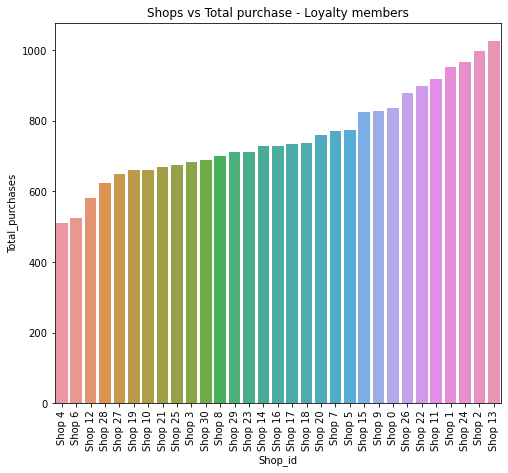

In [62]:
#plotting shopwise total purchases 
plt.subplots(figsize=(8,7))
plt.title('Shops vs Total purchase - Loyalty members')
plt.xticks(rotation=90)
sns.barplot(x='Shop_id',y='Total_purchases',data=loyalty_in_shops,order=loyalty_in_shops.sort_values('Total_purchases').Shop_id)
plt.show()

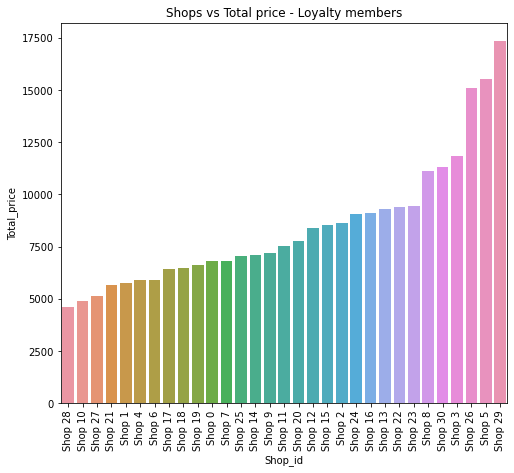

In [63]:
plt.subplots(figsize=(8,7))
plt.title('Shops vs Total price - Loyalty members')
plt.xticks(rotation=90)
sns.barplot(x='Shop_id',y='Total_price',data=loyalty_in_shops,order=loyalty_in_shops.sort_values('Total_price').Shop_id)
plt.show()           

<b>Based on the above 2 plots ,  
    
1.Shops 13,2,24,1,11 are the top 5 shops in terms of total purchases made  
and Shops 29,25,26,3,30 are the shops with highest total prices of purchases made.  
2.There is no steep increase in Total Purchase made in different shops whereas the shops with highest total price  
has some spike in total price compared to other shops.  
3.This concludes that shops that have highest total purchases might represent some cheaper products whereas the   
Shops with highest total price might be having fewer purchase of pricy products ..

In [64]:
#analysing users not in loyalty program
not_in_loyalty_df=retail_df[retail_df['Loyalty_program']==0]
not_in_loyalty_df.head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one,Purchase_year,Purchase_month,Purchase_week,Purchase_day,Total_price
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,2016,12,49,2016-12-10,4.62
1,541104,21873,0,2017-01-13 14:29:00,18427.0,0,Shop 0,0.42,2017,1,2,2017-01-13,0.00
2,540418,21873,1,2017-01-07 11:04:00,18427.0,0,Shop 0,0.42,2017,1,1,2017-01-07,0.42
3,541516,21873,2,2017-01-18 17:34:00,18427.0,0,Shop 0,0.42,2017,1,3,2017-01-18,0.84
5,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42,2016,12,50,2016-12-14,0.42


In [65]:
not_in_loyalty_df.duplicated().sum()

0

In [66]:
not_in_loyalty_df.isna().sum()

Purchase_id        0
Item_id            0
Quantity           0
Purchase_date      0
Customer_id        0
Loyalty_program    0
Shop_id            0
Price_per_one      0
Purchase_year      0
Purchase_month     0
Purchase_week      0
Purchase_day       0
Total_price        0
dtype: int64

In [67]:
not_in_loyalty_df.sort_values(by='Purchase_date').head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one,Purchase_year,Purchase_month,Purchase_week,Purchase_day,Total_price
51298,536368,22914,2,2016-12-01 08:34:00,18726.0,0,Shop 12,4.95,2016,12,48,2016-12-01,9.90
84241,536367,22623,2,2016-12-01 08:34:00,18726.0,0,Shop 2,4.25,2016,12,48,2016-12-01,8.50
23613,536368,22960,5,2016-12-01 08:34:00,18726.0,0,Shop 12,3.75,2016,12,48,2016-12-01,18.75
9246,536367,22622,1,2016-12-01 08:34:00,18726.0,0,Shop 2,8.50,2016,12,48,2016-12-01,8.50
85105,536367,22745,5,2016-12-01 08:34:00,18726.0,0,Shop 2,1.85,2016,12,48,2016-12-01,9.25


In [68]:
#analyse data
not_in_loyalty_df[not_in_loyalty_df['Purchase_id']=='544681']['Customer_id'].unique()

array([18427.])

In [69]:
#analyse data
not_in_loyalty_df[not_in_loyalty_df['Purchase_id']=='538349']['Customer_id'].unique()

array([18427.])

In [70]:
#analyse data
not_in_loyalty_df[not_in_loyalty_df['Purchase_id']=='538145'].head()

,Purchase_id,Item_id,Quantity,Purchase_date,Customer_id,Loyalty_program,Shop_id,Price_per_one,Purchase_year,Purchase_month,Purchase_week,Purchase_day,Total_price
861,538145,82494L,5,2016-12-09 16:08:00,20890.0,0,Shop 20,2.55,2016,12,49,2016-12-09,12.75
8295,538145,85123A,5,2016-12-09 16:08:00,20890.0,0,Shop 20,0.00,2016,12,49,2016-12-09,0.00
15731,538145,84913B,3,2016-12-09 16:08:00,20890.0,0,Shop 20,3.29,2016,12,49,2016-12-09,9.87
20864,538145,22469,11,2016-12-09 16:08:00,20890.0,0,Shop 20,1.45,2016,12,49,2016-12-09,15.95
23190,538145,22236,0,2016-12-09 16:08:00,20890.0,0,Shop 20,10.95,2016,12,49,2016-12-09,0.00


***So , we got the final data of members  not in loyalty program to proceed with analysis.***

In [71]:
#number of unique customers
not_in_loyalty_df['Customer_id'].nunique()

1162

In [72]:
#gettng detailed view based on the date ,customer and shop id
not_in_loyalty_pivot=not_in_loyalty_df.pivot_table(index=['Purchase_year','Purchase_month','Purchase_week','Purchase_day','Customer_id','Shop_id'],values=['Purchase_id','Total_price'],aggfunc={'Purchase_id':'count','Total_price':'sum'}).reset_index()
not_in_loyalty_pivot.columns=['Purchase_year','Purchase_month','Purchase_week','Purchase_day','Customer_id','Shop_id','Total_purchases','Total_price']
not_in_loyalty_pivot.head()

,Purchase_year,Purchase_month,Purchase_week,Purchase_day,Customer_id,Shop_id,Total_purchases,Total_price
0,2016,12,48,2016-12-01,18110.0,Shop 10,14,215.27
1,2016,12,48,2016-12-01,18112.0,Shop 27,73,1050.72
2,2016,12,48,2016-12-01,18151.0,Shop 0,14,-91.64
3,2016,12,48,2016-12-01,18262.0,Shop 0,20,644.57
4,2016,12,48,2016-12-01,18341.0,Shop 14,15,136.35


In [73]:
#getting total purchase and price for each shop
not_in_loyalty_shops=not_in_loyalty_pivot.pivot_table(index='Shop_id',values=['Total_purchases','Total_price'],aggfunc={'Total_purchases':'sum','Total_price':'sum'}).reset_index()
not_in_loyalty_shops.columns=['Shop_id','Total_price','Total_purchases']
not_in_loyalty_shops['loyalty']=0
not_in_loyalty_shops.sort_values(by='Total_price',ascending=False).head()

,Shop_id,Total_price,Total_purchases,loyalty
7,Shop 15,103029.07,1854,0
0,Shop 0,98382.34,37466,0
26,Shop 5,47507.37,1694,0
25,Shop 4,33891.57,1454,0
13,Shop 20,31724.15,1642,0


In [74]:
not_in_loyalty_shops.describe()

,Total_price,Total_purchases,loyalty
count,31.000000,31.000000,31.0
mean,23029.691935,2609.354839,0.0
std,26819.103662,6472.953188,0.0
min,-64711.650000,981.000000,0.0
25%,15960.640000,1261.000000,0.0
50%,17715.360000,1469.000000,0.0
75%,25366.630000,1645.000000,0.0
max,103029.070000,37466.000000,0.0


In [75]:
print(np.percentile(not_in_loyalty_shops['Total_price'],[1,5,50,85,90,95,99]))

[-41925.336  11789.185  17715.36   30917.535  33891.57   72944.855
 101635.051]


***On analysing the above table ,we see that there are some outliers in total prices ..   
Based on the above analysis , we remove less tahn 1 % of data that are negative and 5% data that are more than 40000.***

In [76]:
#filtering datset without outliers
not_in_loyalty_shops = not_in_loyalty_shops[((not_in_loyalty_shops['Total_price'] > 0) & (not_in_loyalty_shops['Total_price'] < 40000))]
not_in_loyalty_shops.sort_values(by='Total_price',ascending=False).head()

,Shop_id,Total_price,Total_purchases,loyalty
25,Shop 4,33891.57,1454,0
13,Shop 20,31724.15,1642,0
5,Shop 13,30110.92,1384,0
18,Shop 25,27445.29,1228,0
21,Shop 28,25612.18,1682,0


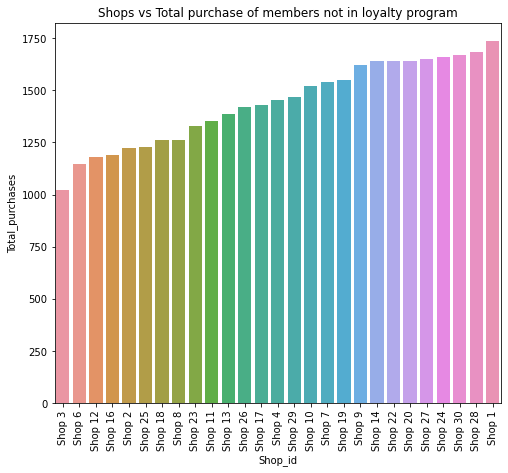

In [77]:
#plotting total purchases and shops
plt.subplots(figsize=(8,7))
plt.title('Shops vs Total purchase of members not in loyalty program')
plt.xticks(rotation=90)
sns.barplot(x='Shop_id',y='Total_purchases',data=not_in_loyalty_shops,order=not_in_loyalty_shops.sort_values('Total_purchases').Shop_id)
plt.show()

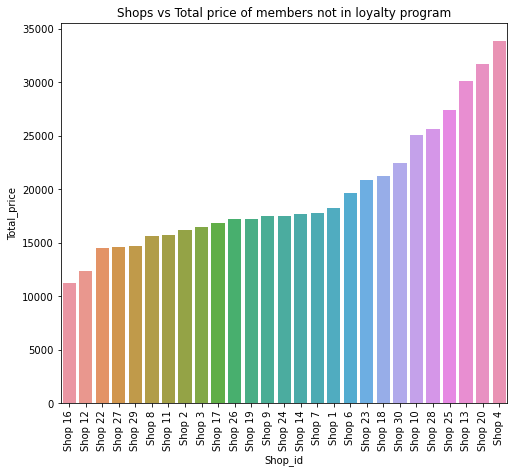

In [78]:
plt.subplots(figsize=(8,7))
plt.title('Shops vs Total price of members not in loyalty program')
plt.xticks(rotation=90)
sns.barplot(x='Shop_id',y='Total_price',data=not_in_loyalty_shops,order=not_in_loyalty_shops.sort_values('Total_price').Shop_id)
plt.show()

<b>1.Shop 28 does well in terms of total purchase and total price for members not in loyalty programs.  
   2.There are more number of shops doing well without being in loyalty membership in terms of total purchase.  
   3.Shops 4,20,13,25 and 28 are the top 5 shops in terms of total_price.

In [79]:
#appending loyalty and non_loyalty dataset to help with comparing the data.
compare_df=loyalty_in_shops.append(not_in_loyalty_shops)

In [80]:
compare_df

,Shop_id,Total_price,Total_purchases,loyalty
22,Shop 29,17355.87,712,1
26,Shop 5,15538.77,775,1
19,Shop 26,15070.21,880,1
23,Shop 3,11830.23,683,1
24,Shop 30,11301.74,689,1
29,Shop 8,11107.22,700,1
16,Shop 23,9456.06,713,1
15,Shop 22,9369.71,898,1
5,Shop 13,9296.84,1027,1
8,Shop 16,9118.30,729,1


<AxesSubplot:title={'center':'Shops vs Total price based on loyalty program'}, xlabel='Shop_id', ylabel='Total_price'>

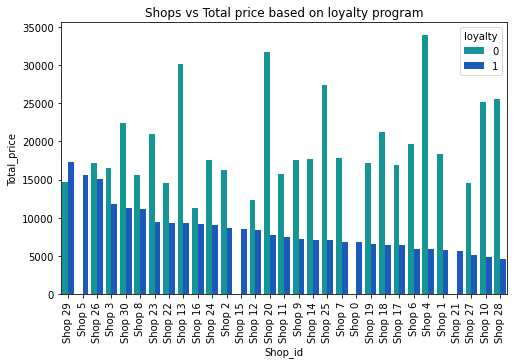

In [81]:
#plotting total price comparison
plt.subplots(figsize=(8,5))   # set fig size
plt.title('Shops vs Total price based on loyalty program')
plt.xticks(rotation=90)  # rotate tick
sns.barplot(x="Shop_id", y="Total_price", hue="loyalty", data=compare_df,palette="winter_r")

<b>Overall , members not in loyalty program tend to contribute more to total_prices from purchases.  
   Shops 29,5,26 seem to have success with loyalty programs as we see higher total price from loyalty memebers compared to          members not in loyalty program.  
   The above plot clearly shows that only 3 out of 31 shops has success with loyalty membership program.

<AxesSubplot:title={'center':'Shops vs Total purchase based on loyalty program'}, xlabel='Shop_id', ylabel='Total_purchases'>

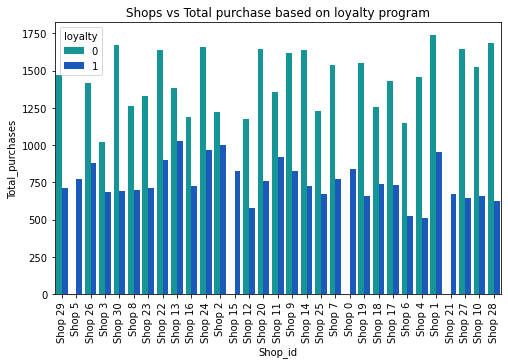

In [82]:
#plotting total purchases comparison
plt.subplots(figsize=(8,5))   # set fig size
plt.title('Shops vs Total purchase based on loyalty program')
plt.xticks(rotation=90)  # rotate tick
sns.barplot(x="Shop_id", y="Total_purchases", hue="loyalty", data=compare_df,palette="winter_r")

<b>1.There is significant difference between purchases made with customers not in loyalty program making more purchases.  
   2.Though members not in loyalty program has increased total number of purchases and total_prices , Shop 29,5,26 shows  
   success with loyalty program as they have increased total price compared to members not in loyalty program.

<b>Conclusion:  
   Based on all the above analysis , we don't see significant improvement or success with loyalty program.  
   We conclude our hypothesis as  
   1.Members of loyalty program didn't spent more money on purchase .  
   2.Loyalty program members purchase fewer products compared to members not in loyalty membership.  
   3.Loyalty program is used by only 20% of users overall.  
   4.Only 3 shops are successful with loyalty program.  
   5.First week of a month doesn't impact much on purchasing trend of the customers.

<a id='sda'>

## Statistical data analysis

<b>Null Hpoythesis Ho - Money spent by both the type of users(loyalty,not in loyalty) are equal.  
Alternate Hypothesis H1 -Money spent by customers in loyalty program differs from those not in loyalty program. 

In [83]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(loyalty_in_shops['Total_price'], not_in_loyalty_shops['Total_price'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  7.224530014939712e-13
We reject the null hypothesis


<b>Null Hpoythesis Ho - Total number of purchases made by both the type of users(loyalty,not in loyalty) are equal.  
Alternate Hypothesis H1 -Total purchases made by customers in loyalty program differs from those not in loyalty program.

In [84]:
results = st.ttest_ind(loyalty_in_shops['Total_purchases'], not_in_loyalty_shops['Total_purchases'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  5.123322902016816e-22
We reject the null hypothesis


<b>Our stasistical test results confirm that the total purchase and total price between the two types of customers are  
significantly different as proposed by exploratory data analysis.

<a id='end'>

## Final Conclusion    
<b>Some of the conclusions made from our analysis.  
1.Members of loyalty program didn't spent more money on purchase .  
2.Loyalty program members purchase fewer products compared to members not in loyalty membership.  
3.Loyalty program is used only by 20% of users overall.  
4.Only 3 shops are successful with loyalty program.  
5.First week of a month doesn't impact much on purchasing trend of the customers.  

Our analysis shows that the Loyalty program doesn't prove to be successful as total purchases and total price from customers  
who are not members of loyalty program are significantly more.Also only 3 out of 31 shops shows success with loyalty customers  
with number of loyalty membership customers just 20-25% of total customers.


<a id='presentation'>

[Presentation](https://docs.google.com/presentation/d/1cb8KlSWv5mRlTz1r3T34r0Pq8bUSqdgu/edit?usp=sharing&ouid=113662054605653502082&rtpof=true&sd=true)


<a id='doc'>

## Documentation  
1.https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/ - Plot barplots for EDA.  
2.https://www.analyticsvidhya.com/blog/2021/10/a-complete-guide-to-dealing-with-missing-values-in-python/  -  Deal missing values in the dataset.  
3.https://www.softwareadvice.com/resources/retail-data-analysis-to-boost-sales/#:~:text=Retail%20data%20analysis%20is%20exactly%20what%20the%20name,their%20purchases%20and%20foot%20traffic%20in%20your%20store.  - Learn about retail data analysis.  
4.https://www.geeksforgeeks.org/data-analysis-with-python/ - Reference for any coding issues.  
5.https://towardsdatascience.com/an-introduction-to-statistical-analysis-and-modelling-with-python-ef816b67f8ff - Statistical Data Analysis using python  
6.https://stackoverflow.com - Reference for any coding issues.  


<a id='dashboard'>   

## Dashboard

[Dashboard](https://public.tableau.com/app/profile/reva2566/viz/HomeWorld/HomeWorld?publish=yes)